# Demo of the single pulse spatial visualization

In [163]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from helpers import *
from single_pulse_functions import *
from collections import defaultdict
from itertools import product
from scipy import signal, integrate

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load data
LFP, stim_ind = load_LFP_data('C09_2018_11_08_A_LFP1.mat', 'LFP1')

## Extracting the bandpower after stimulations

I am doing this on a subset of the dataset by considering fewer stimulation responses to speed up the computation. In practice this should be done on the entire dataset.

I extract the bandpower for each of the 96 channels of the Utah Array for the recordings. This first portion is shown using the Utah array

In [154]:
# To make nested dictionaries
tree = lambda: defaultdict(tree)
results = tree()

# Get useful constants for the loops
channels = np.arange(96)
fs = LFP['samplingFreq']
n_inds = 150 # only look at the first 150 out of 1000 iterations of procedure 1
band = [1, 30] # frequencies to bandpass, change as needed
wtime=50
baseline_time = 100
art_time = 0 # not considering artifacts

for channel in channels:
    # z-score the signal
    raw_signal = (LFP['LFP1'][channel, :])

    # Band-pass the signal 
    b, a = signal.butter(2, [band[0], band[1]], btype='bp', fs=fs)
    filtered_signal = signal.lfilter(b, a, raw_signal)
   
    # Remove the baseline and extract the signal after the pulse
    baseline, _ = extract_baseline(filtered_signal, fs, stim_ind[:n_inds])
    response = extract_stim_response(filtered_signal, fs, stim_ind[:n_inds], wtime=wtime, art_time=art_time, baseline=baseline )
   
    # Get the bandpower
    bandpower = get_bandpower(response.flatten(), fs, band)

    # Store information about the tiral
    results[channel]['channel'] = channel + 1 # Since Matlab starts indexing at 1
    results[channel]['band'] = str(band)
    results[channel]['f_low'] = band[0]
    results[channel]['f_high'] = band[1]
    results[channel]['baseline_time'] = baseline_time
    results[channel]['response_time'] = wtime
    results[channel]['band_power'] = bandpower
        
# Convert dictionary to dataframe
df = pd.DataFrame.from_records(results).T
df = df.astype({'channel': 'int',
                'band' : 'string', 
                'f_low' : 'float', 
                'f_high': 'float', 
                'baseline_time' : 'float',
                'response_time' : 'float',
                'band_power' : 'float'})

# Append electrodes
df = append_electrodes(df, 'utah')

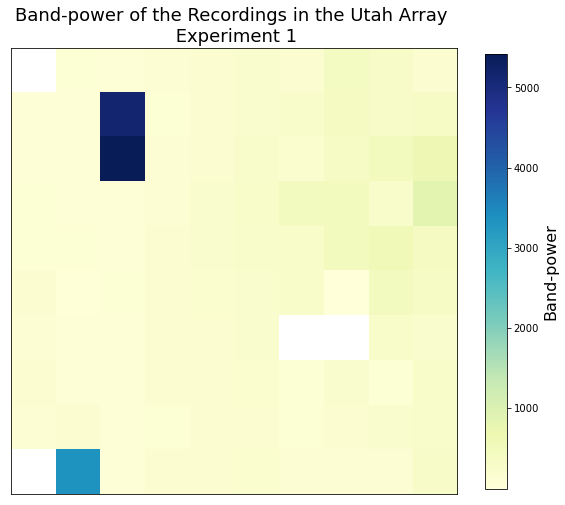

In [155]:
fig, ax = plt.subplots(figsize=(10,10))

# Puts the values in the right orientation
spatial_map = get_utah_spatial_map(df, 'band_power')

# This actually plots it
im = ax.imshow(spatial_map, cmap = 'YlGnBu', vmin=np.nanmin(spatial_map), vmax=np.nanmax(spatial_map))

# Making the plot look better
ax.set_title('Band-power of the Recordings in the Utah Array \n Experiment 1', fontsize=18)
ax.set_xticks([])
ax.set_yticks([])
cbar = fig.colorbar(im, shrink=0.8) 
cbar.set_label('Band-power',size=16)

The next is an example using FMAs for recordings

In [159]:
# Load data for FMA recordings
LFP, stim_ind = load_LFP_data('C09_2018_10_25_D_LFP2.mat', 'LFP2')

In [162]:
# To make nested dictionaries
tree = lambda: defaultdict(tree)
results = tree()

# Get useful constants for the loops
channels = np.arange(32)
fs = LFP['samplingFreq']
n_inds = 150 # only look at the first 150 out of 1000 iterations of procedure 1
band = [1, 30] # frequencies to bandpass, change as needed
wtime=50
baseline_time = 100
art_time = 0 # not considering artifacts

for channel in channels:
    # z-score the signal
    raw_signal = (LFP['LFP2'][channel, :])

    # Band-pass the signal 
    b, a = signal.butter(2, [band[0], band[1]], btype='bp', fs=fs)
    filtered_signal = signal.lfilter(b, a, raw_signal)
   
    # Remove the baseline and extract the signal after the pulse
    baseline, _ = extract_baseline(filtered_signal, fs, stim_ind[:n_inds])
    response = extract_stim_response(filtered_signal, fs, stim_ind[:n_inds], wtime=wtime, art_time=art_time, baseline=baseline )
   
    # Get the bandpower
    bandpower = get_bandpower(response.flatten(), fs, band)

    # Store information about the tiral
    results[channel]['channel'] = channel + 1 # Since Matlab starts indexing at 1
    results[channel]['band'] = str(band)
    results[channel]['f_low'] = band[0]
    results[channel]['f_high'] = band[1]
    results[channel]['baseline_time'] = baseline_time
    results[channel]['response_time'] = wtime
    results[channel]['band_power'] = bandpower
        
# Convert dictionary to dataframe
df = pd.DataFrame.from_records(results).T
df = df.astype({'channel': 'int',
                'band' : 'string', 
                'f_low' : 'float', 
                'f_high': 'float', 
                'baseline_time' : 'float',
                'response_time' : 'float',
                'band_power' : 'float'})

# Append electrodes
df = append_electrodes(df, 'fma')

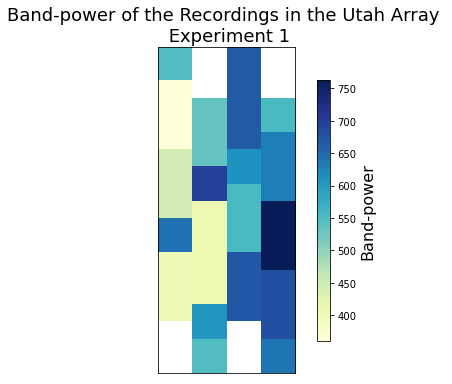

In [165]:
fig, ax = plt.subplots(figsize=(8,6))

# Puts the values in the right orientation
spatial_map = get_fma_spatial_map(df, 'band_power')

# This actually plots it
im = ax.imshow(spatial_map, cmap = 'YlGnBu', vmin=np.nanmin(spatial_map), vmax=np.nanmax(spatial_map))

# Making the plot look better
ax.set_title('Band-power of the Recordings in the Utah Array \n Experiment 1', fontsize=18)
ax.set_xticks([])
ax.set_yticks([])
cbar = fig.colorbar(im, shrink=0.8) 
cbar.set_label('Band-power',size=16)